# Shuffling Method

Inspired by [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers) by Jake VanderPlas

Let's say you have 2 sets of test scores:  
    
    84, 72, 57, 46, 63, 76, 99, 91 
    
and  
    
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69  
    
The mean of the first set of test scores is 73.5 and the mean of the second set of test scores is 66.9.  
The difference between the 2 means is 6.58.

Is this difference statistically significant?

## Below is how I applied the shuffling method using Python programming language

In [578]:
# embed the matplotlib charts within this jupyter notebook
%matplotlib inline
import numpy as np               # library to allow us to use vectorized data structures and has useful stats functions
import matplotlib.pyplot as plt  # plotting library

test1 = [
    84, 72, 57, 46, 63, 76, 99, 91
]

test2 = [
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69
]

test_scores1 = np.array(test1)
test_scores2 = np.array(test2)

### Mean from test scores set 1:

In [563]:
test_scores1.mean()

73.5

### Mean from test scores set 2:

In [564]:
test_scores2.mean()

66.916666666666671

In [579]:
diff = test_scores1.mean() - test_scores2.mean()
diff

6.5833333333333286

### Is the difference in the means statistically significant?

## Let's apply the shuffling method

### Create draw space from which we will sample data from which consists of both test scores

In [566]:
combined = np.concatenate((test_scores1, test_scores2))

### Let's double-check that the list has what we want

In [567]:
combined

array([84, 72, 57, 46, 63, 76, 99, 91, 81, 69, 74, 61, 56, 87, 69, 65, 66,
       44, 62, 69])

### Now we will perform the experiment 10,000 times, picking random numbers from the draw space with replacement.  numpy's random.choice() function is really handy for this!

In [581]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    Parameters
    -----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a was np.arange(n)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry in a.
        If not given the sample assumes a uniform distribution over all
        entries in a.
    
    Returns
    --------
    samples : 1-D ndarray, s

In [568]:
diff_means = np.array([])   # array that will contain the difference in the means

# perform the following 10000 times where we draw random test values from the combined list
# and calculate the difference between the means, then add/append the differnce to the diff_means array
for i in range(10000):
    diff_means = np.append(diff_means, np.random.choice(combined, size=len(test_scores1), replace=True).mean()
                           - np.random.choice(combined, size=len(test_scores2), replace=True).mean()
                          )

### Create a histogram of the difference in the means along with a vertical red line where the stated difference lies on the x-axis (6.58)

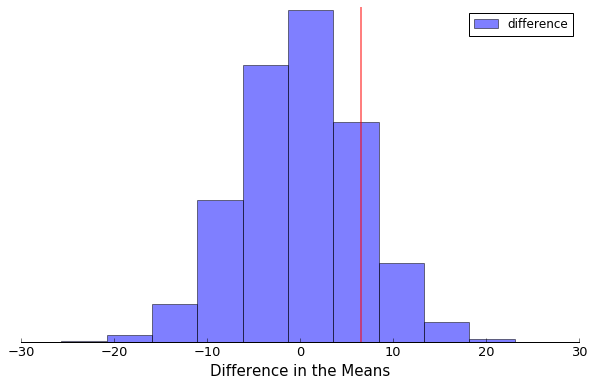

In [569]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_means, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(diff, linewidth=2, alpha=0.5, color='red')
plt.show()

In [570]:
# obtain all observations greater than or equal to the stated difference
gt_diff = diff_means[diff_means >= diff]

# calculate portion of differences that are greater than or equal to the stated difference
p = len(gt_diff) / 10000

# print results
print('Out of 10,000 samples, the probability that the difference in the means is >= ' + 
      "{0:.2f}".format(diff) + ' is ' + str(p))

Out of 10,000 samples, the probability that the difference in the means is >= 6.58 is 0.1505


Since the simulated probability that the difference in the means will be greater than or equal to 6.58 is greater than 0.05, the difference in the means of the 2 sets of test scores is **NOT** significant.  In other words, there is a probability of almost 15% that the difference in the means will be greater than or equal to 6.58.  We want it to be less tha 5% to be considered statistically "significant".

# Calculating 90% Confidence Interval for the Difference In the Means

Same shuffling and calculating the difference in the means as before:

In [571]:
diff_means_conf = np.array([])
for i in range(10000):
    diff_means = np.append(diff_means_conf, np.random.choice(combined, size=len(test_scores1), replace=True).mean()
                           - np.random.choice(combined, size=len(test_scores2), replace=True).mean()
                          )

In [572]:
# sort the difference values in the means since we will need to identify lower and upper bound
diff_means_conf.sort()

# set confidence interval and tail values
conf_interval = 0.9
tails = (1 - conf_interval) / 2

# calculate the value that is at the lowest 5% mark out of 10000 = 500th value
lower_bound = int(np.ceil(10000 * tails))

# calclate the value that is at the highest 5% mark out of 10000 = 9500th value
upper_bound = int(np.floor(10000 * (1 - tails)))

In [573]:
diff_means_conf[lower_bound]

-10.583333333333329

In [574]:
diff_means_conf[upper_bound]

10.208333333333336

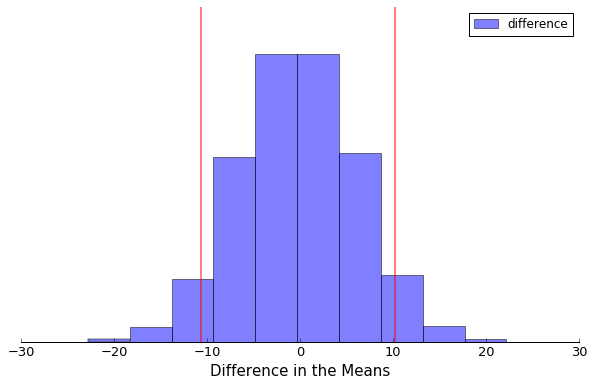

In [575]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_means_conf, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(diff_means_conf[lower_bound], linewidth=2, alpha=0.5, color='red')
plt.axvline(diff_means_conf[upper_bound], linewidth=2, alpha=0.5, color='red')
plt.show()

In [577]:
print('With 90% confidence, the true difference in the means will fall between ' + 
      "{0:.2f}".format(diff_means_conf[lower_bound]) + ' and ' + "{0:.2f}".format(diff_means_conf[upper_bound]))

With 90% confidence, the true difference in the means will fall between -10.58 and 10.21
